Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.9230 - mae: 0.3814 - val_loss: 24.7666 - val_mae: 0.7120
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0862 - mae: 0.1493 - val_loss: 23.2562 - val_mae: 0.6811
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0598 - mae: 0.1274 - val_loss: 22.8930 - val_mae: 0.6761
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0545 - mae: 0.1203 - val_loss: 22.6027 - val_mae: 0.6706
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0553 - mae: 0.1208 - val_loss: 22.5249 - val_mae: 0.6717
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 0.0463 - mae: 0.1144 - val_loss: 22.1597 - val_mae: 0.6563
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0438 - mae: 0.1095 - val_loss: 21.8579 - val_mae: 0.6647
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0407 - mae: 0.1098 - val_loss: 21.9879 - val_mae: 0.6546
Epoch 9/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.1584 - mae: 0.3920 - val_loss: 2.8428 - val_mae: 0.3031
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0908 - mae: 0.1492 - val_loss: 2.8021 - val_mae: 0.2969
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0697 - mae: 0.1314 - val_loss: 2.2116 - val_mae: 0.2614
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0506 - mae: 0.1151 - val_loss: 1.5541 - val_mae: 0.2321
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0510 - mae: 0.1141 - val_loss: 1.6713 - val_mae: 0.2285
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0518 - mae: 0.1114 - val_loss: 2.3391 - val_mae: 0.2603
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0518 - mae: 0.1124 - val_loss: 1.3510 - val_mae: 0.2079
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0386 - mae: 0.1000 - val_loss: 1.5981 - val_mae: 0.2211
Epoch 9/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0370 

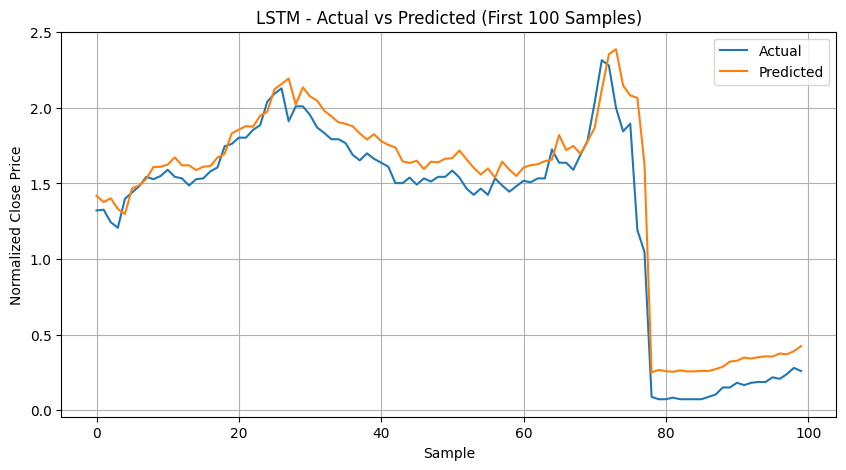

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

📊 CNN Evaluation:
MAE: 0.2807
MSE: 2.5135
RMSE: 1.5854
R² Score: 0.9330
Directional Accuracy: 41.73%


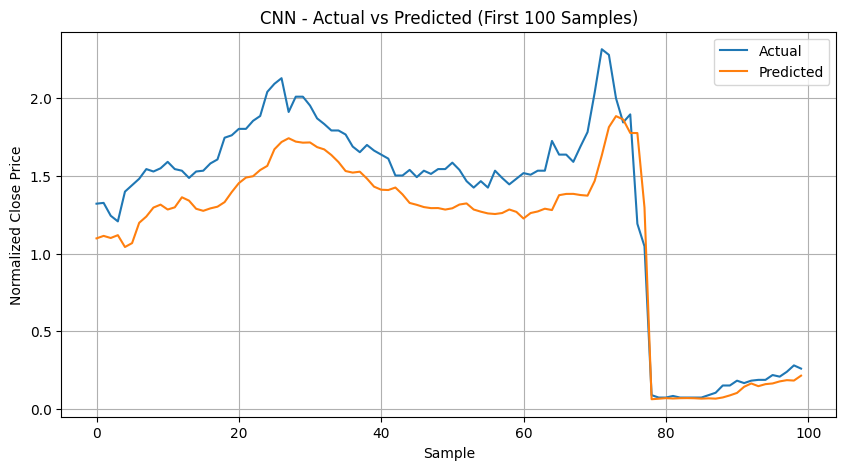

In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout
import matplotlib.pyplot as plt


df = pd.read_csv("/content/drive/MyDrive/Time series/ohlc2.csv")


df['Date'] = pd.to_datetime(df['Date'].str.replace('.csv', '', regex=False), format='%Y-%m-%d')

 # Rename 'Symbol' to 'Scrip' for consistency
df = df.rename(columns={'Symbol': 'Scrip'})


df['Volume'] = df['Vol'].str.replace(',', '').astype(float)


df.drop(columns=['S.no', 'Vol'], inplace=True)


df = df.sort_values(by=['Scrip', 'Date'])


le = LabelEncoder()
df['Scrip_encoded'] = le.fit_transform(df['Scrip'])


features = ['Open', 'High', 'Low', 'Close', 'Volume']
df[features] = df[features].fillna(df[features].median())
scaler = RobustScaler()
df[features] = scaler.fit_transform(df[features])



def create_sequences(data, seq_len=30):
    X, y = [], []
    for scrip in data['Scrip_encoded'].unique():
        scrip_data = data[data['Scrip_encoded'] == scrip][features].values
        for i in range(len(scrip_data) - seq_len):
            X.append(scrip_data[i:i+seq_len])

            y.append(scrip_data[i+seq_len][3])
    return np.array(X), np.array(y)

seq_len = 30
X, y = create_sequences(df, seq_len)

# Train-test split (85% training)
split = int(len(X) * 0.85)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# --- 4. LSTM Model ---
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

lstm_model = build_lstm_model(X_train.shape[1:])
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=64,
                              validation_data=(X_test, y_test), verbose=1)

# --- 5. CNN Model ---
def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

cnn_model = build_cnn_model(X_train.shape[1:])
cnn_history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=64,
                            validation_data=(X_test, y_test), verbose=1)


def directional_accuracy(actual, predicted):

    actual_direction = np.sign(np.diff(actual))
    predicted_direction = np.sign(np.diff(predicted))
    return np.mean(actual_direction == predicted_direction) * 100


def evaluate_model(model, X_test, y_test, model_name):
    # Predict
    y_pred = model.predict(X_test).flatten()

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    dacc = directional_accuracy(y_test, y_pred)

    # Print evaluation metrics
    print(f"\n📊 {model_name} Evaluation:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Directional Accuracy: {dacc:.2f}%")

    # Plot Actual vs Predicted for first 100 samples
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:100], label='Actual')
    plt.plot(y_pred[:100], label='Predicted')
    plt.title(f'{model_name} - Actual vs Predicted (First 100 Samples)')
    plt.xlabel('Sample')
    plt.ylabel('Normalized Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

evaluate_model(lstm_model, X_test, y_test, "LSTM")
evaluate_model(cnn_model, X_test, y_test, "CNN")


106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


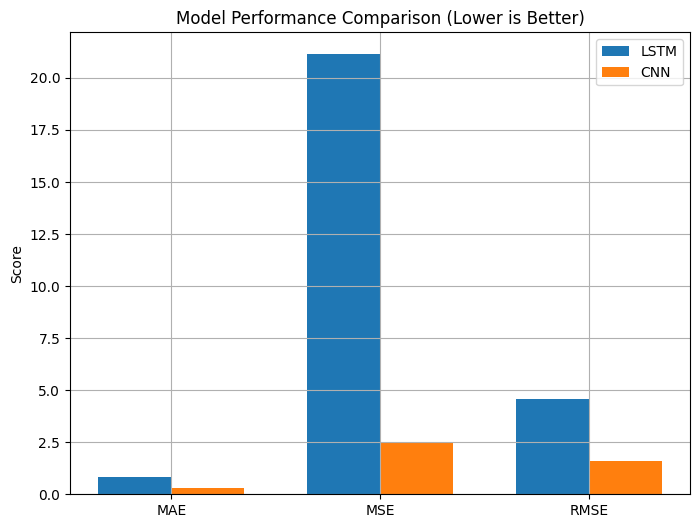

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions
y_pred_lstm = lstm_model.predict(X_test).flatten()
y_pred_cnn = cnn_model.predict(X_test).flatten()

# Compute metrics
def compute_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

mae_lstm, mse_lstm, rmse_lstm = compute_metrics(y_test, y_pred_lstm)
mae_cnn, mse_cnn, rmse_cnn = compute_metrics(y_test, y_pred_cnn)


metrics = ['MAE', 'MSE', 'RMSE']
lstm_scores = [mae_lstm, mse_lstm, rmse_lstm]
cnn_scores = [mae_cnn, mse_cnn, rmse_cnn]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, lstm_scores, width, label='LSTM')
plt.bar(x + width/2, cnn_scores, width, label='CNN')
plt.ylabel('Score')
plt.title('Model Performance Comparison (Lower is Better)')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True)
plt.show()


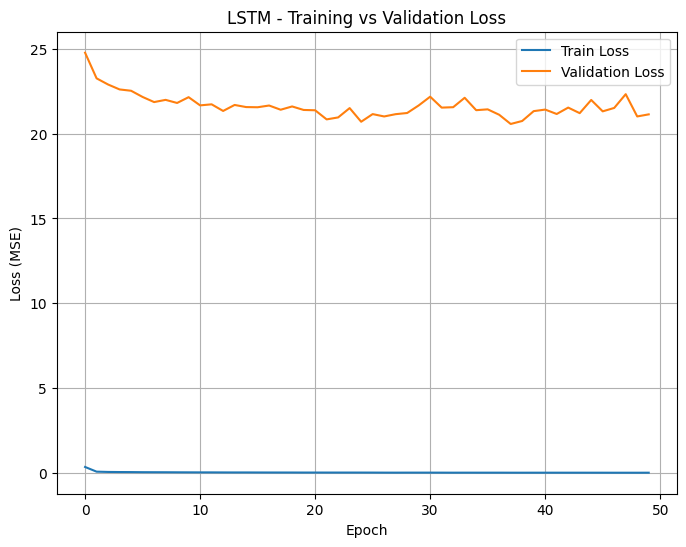

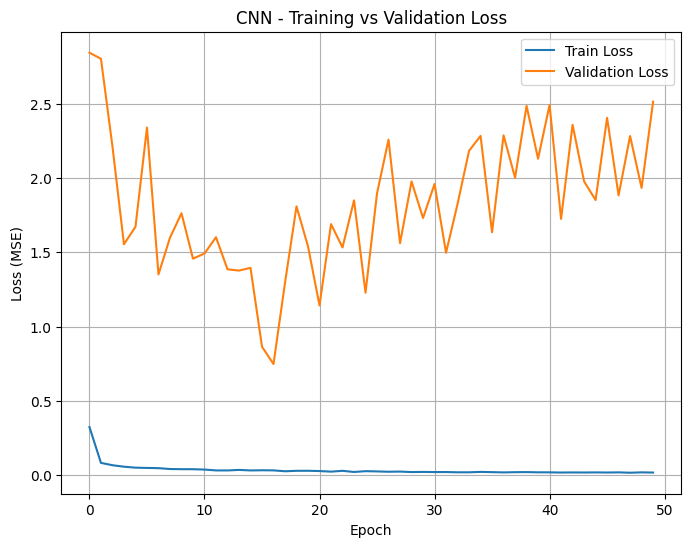

In [ ]:

def plot_training_history(history, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(lstm_history, 'LSTM')
plot_training_history(cnn_history, 'CNN')

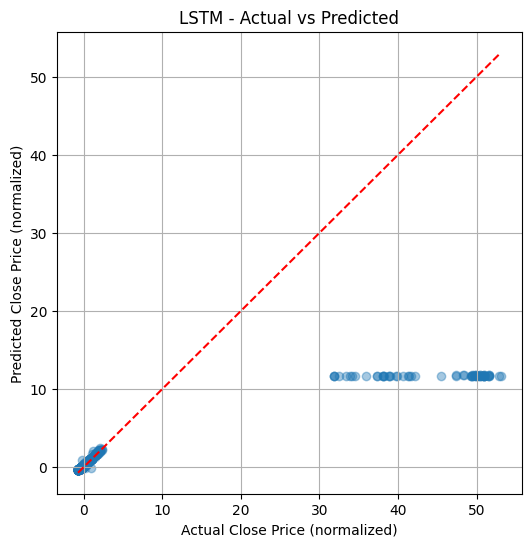

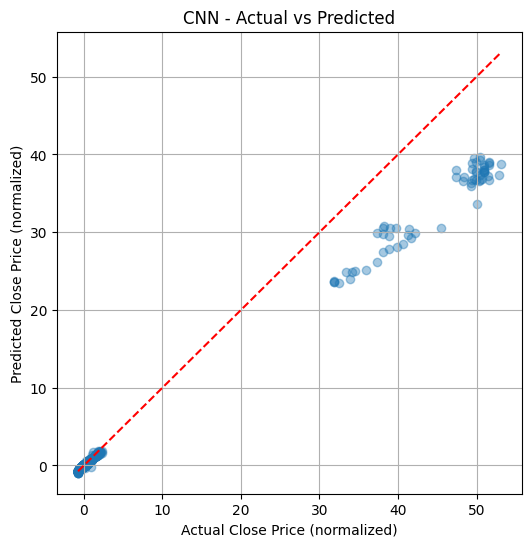

In [ ]:

def plot_scatter(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.4)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')  # perfect line
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.xlabel('Actual Close Price (normalized)')
    plt.ylabel('Predicted Close Price (normalized)')
    plt.grid(True)
    plt.show()

plot_scatter(y_test, y_pred_lstm, 'LSTM')
plot_scatter(y_test, y_pred_cnn, 'CNN')


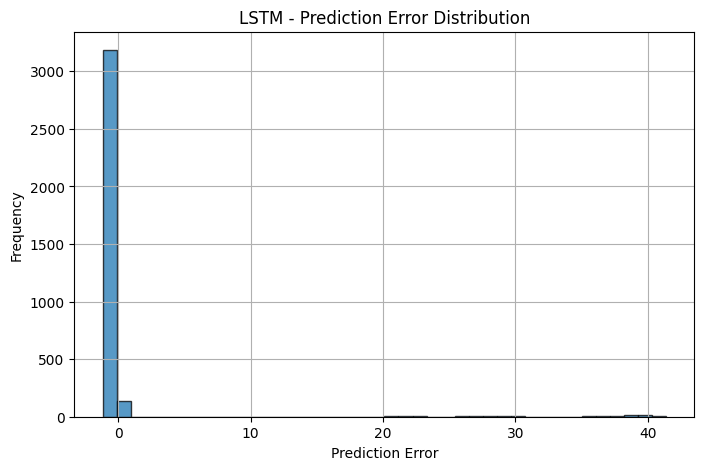

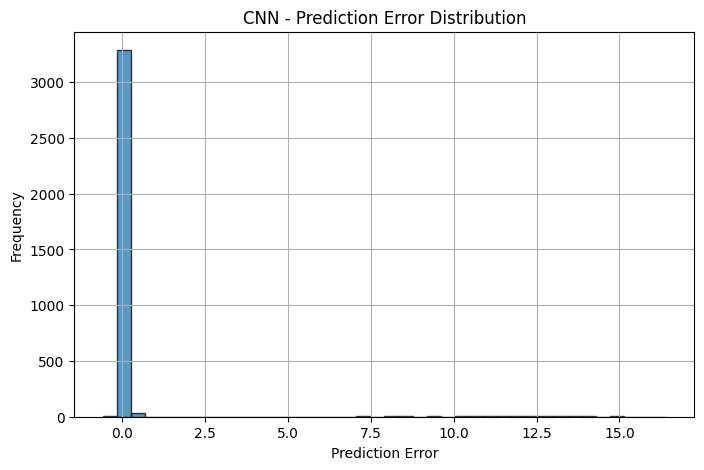

In [ ]:
# --- 4. Error Histogram ---
def plot_error_histogram(y_true, y_pred, model_name):
    errors = y_true - y_pred
    plt.figure(figsize=(8, 5))
    plt.hist(errors, bins=40, edgecolor='black', alpha=0.75)
    plt.title(f'{model_name} - Prediction Error Distribution')
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

plot_error_histogram(y_test, y_pred_lstm, 'LSTM')
plot_error_histogram(y_test, y_pred_cnn, 'CNN')